# Proof of Concept

The objective of this notebook is to develop a proof of concept:
- Load tweets from twarc-extracted `jsonl` files.
- Parse tweets and use `Vader` to add sentiment.
- Show a brief example analysis.

## 0. Load Env

In [49]:
import os
import json
import pandas as pd
import numpy as np
from typing import List, Dict, Tuple, Any, Callable, Union
from functools import reduce
from operator import getitem
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', None)
nltk.download('vader_lexicon')
tqdm.pandas()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/b.feifke/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:
#RAW_DATA_DIR = "/Users/pyrol/code/gym-vendor-analysis/data/"
RAW_DATA_DIR = "../data/"

In [6]:
TWEET_DICT_KEY_MAPPING = [
    (("url",), "url",),
    (("content",), "content",),
    (("id",), "tweet_id",),
    (("user", "id",), "user_id",),
    (("user", "username",), "user_name",),
    (("date",), "datetime",),
]

In [7]:
def nested_dictionary_get(d: Dict, key: Tuple):
    return reduce(getitem, key, d)


def parse_and_reduce_tweet(tweet: Dict) -> Dict[str, Any]:
    """
    Parses a tweet (represented as a dictionary), reducing the tweet to the schema defined
    in `keys_set`
    """
    new_dict = {new_name: nested_dictionary_get(d=tweet, key=nested_key)
                for nested_key, new_name in TWEET_DICT_KEY_MAPPING}
    return new_dict

In [8]:
def load_and_parse_twarc_file_to_list_of_tweets(filename: str,
                                                include_filename_in_result=True,
                                                raw_data_dir: str = RAW_DATA_DIR
                                               ) -> List:
    path = os.path.join(raw_data_dir, f"{filename}.jsonl")
    print(f"Loading data from {path}.")
    with open(path, 'r') as f:
        if include_filename_in_result:
            tweet_list = [{**parse_and_reduce_tweet(json.loads(line)), **{"vendor": filename}} for line in f]
        else:
            tweet_list = [parse_and_reduce_tweet(json.loads(line)) for line in f]
    return tweet_list

In [9]:
def load_twarc_json_file_to_dataframe(filename: str) -> pd.DataFrame:
    tweets_list = load_and_parse_twarc_file_to_list_of_tweets(filename=filename)
    tweet_df = pd.DataFrame.from_records(tweets_list)
    return tweet_df


def load_twarc_json_files_to_dataframe(filenames: List[str]) -> pd.DataFrame:
    tweet_dfs = [load_twarc_json_file_to_dataframe(filename) for filename in filenames]
    tweet_df = pd.concat(tweet_dfs)
    return tweet_df

In [10]:
def save_tweets_df(df, path):
    print(f"Saving data to {path}.")
    df.to_parquet(path)

In [11]:
def load_tweets_df(path):
    print(f"Loading data from {path}.")
    return pd.read_parquet(path)

## 1. Load Tweets Data, Enrich with Sentiment, and Export

#### Load tweets to a dataframe

In [12]:
gym_vendors = [
    "Arsenal_Strngth",
    "BeTitanFit",
    "BodySolidFit",
    "BodycraftFit",
    "CAPBarbell84",
    "HOISTFitness",
    "HammerStrength",
    "LifeFitness",
    "PRxPerformance",
    "Powertec",
    "RepFitnessEquip",
    "RogueFitness",
    "Sorinex",
    "TorqueFitness",
    "bellsofsteel",
    "concept2",
    "cybex",
    "elitefts",
    "force_usa",
    "onepeloton"
]

In [13]:
# tweet_df = load_twarc_json_file_to_dataframe(path=paths[0], parse_tweet_fxn=parse_and_reduce_tweet)
tweet_df = load_twarc_json_files_to_dataframe(filenames=gym_vendors)

Loading data from ../data/Arsenal_Strngth.jsonl.
Loading data from ../data/BeTitanFit.jsonl.
Loading data from ../data/BodySolidFit.jsonl.
Loading data from ../data/BodycraftFit.jsonl.
Loading data from ../data/CAPBarbell84.jsonl.
Loading data from ../data/HOISTFitness.jsonl.
Loading data from ../data/HammerStrength.jsonl.
Loading data from ../data/LifeFitness.jsonl.
Loading data from ../data/PRxPerformance.jsonl.
Loading data from ../data/Powertec.jsonl.
Loading data from ../data/RepFitnessEquip.jsonl.
Loading data from ../data/RogueFitness.jsonl.
Loading data from ../data/Sorinex.jsonl.
Loading data from ../data/TorqueFitness.jsonl.
Loading data from ../data/bellsofsteel.jsonl.
Loading data from ../data/concept2.jsonl.
Loading data from ../data/cybex.jsonl.
Loading data from ../data/elitefts.jsonl.
Loading data from ../data/force_usa.jsonl.
Loading data from ../data/onepeloton.jsonl.


#### Validate Data

In [14]:
tweet_df.head().T

,0,1,2,3,4
url,https://twitter.com/Ayoobi77/status/1567340537333837824,https://twitter.com/Arsenal_Strngth/status/1567145753360977922,https://twitter.com/Arsenal_Strngth/status/1567144502334308354,https://twitter.com/Ayoobi77/status/1566312069196124166,https://twitter.com/Ayoobi77/status/1566311005038297089
content,@Arsenal_Strngth The true face of sports engineering 🙂\nArsenal Strength,Shipping soon: black on black Reloaded Iso Lat Pull down. https://t.co/GgnZl99ZhI,@Ayoobi77 @Collin_Abel10 @EaglevilleFB @CoachFWalker Thank you! ⚔️,@Collin_Abel10 @Arsenal_Strngth @EaglevilleFB @CoachFWalker The best machine,@Arsenal_Strngth Excellent products from Arsenal Strength 👍👍👍
tweet_id,1567340537333837824,1567145753360977922,1567144502334308354,1566312069196124166,1566311005038297089
user_id,787689201231888384,2942005261,2942005261,787689201231888384,787689201231888384
user_name,Ayoobi77,Arsenal_Strngth,Arsenal_Strngth,Ayoobi77,Ayoobi77
datetime,2022-09-07T02:34:38+00:00,2022-09-06T13:40:38+00:00,2022-09-06T13:35:40+00:00,2022-09-04T06:27:52+00:00,2022-09-04T06:23:38+00:00
vendor,Arsenal_Strngth,Arsenal_Strngth,Arsenal_Strngth,Arsenal_Strngth,Arsenal_Strngth


In [15]:
tweet_df.shape

(832517, 7)

In [16]:
tweet_df.isnull().mean()

url          0.0
content      0.0
tweet_id     0.0
user_id      0.0
user_name    0.0
datetime     0.0
vendor       0.0
dtype: float64

In [17]:
tweet_df.dtypes

url          object
content      object
tweet_id      int64
user_id       int64
user_name    object
datetime     object
vendor       object
dtype: object

#### Preprocess data

##### datetime field

In [18]:
tweet_df["pd_datetime"] = pd.to_datetime(tweet_df["datetime"])

In [19]:
tweet_df.dtypes

url                         object
content                     object
tweet_id                     int64
user_id                      int64
user_name                   object
datetime                    object
vendor                      object
pd_datetime    datetime64[ns, UTC]
dtype: object

#### Create Sample dataframe for testing

In [20]:
tweet_df_sample = tweet_df.sample(1000)

#### Enrich Tweets with sentiment

From [Vader docs](https://vadersentiment.readthedocs.io/en/latest/pages/about_the_scoring.html):  
> The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a ‘normalized, weighted composite score’ is accurate.

In [21]:
analyzer = SentimentIntensityAnalyzer()

In [22]:
tweet_df["sentiment"] = tweet_df["content"].progress_apply(lambda x: analyzer.polarity_scores(x)["compound"])

100%|██████████████████████████████████████████████████████| 832517/832517 [02:49<00:00, 4922.31it/s]


In [23]:
tweet_df.head().T

,0,1,2,3,4
url,https://twitter.com/Ayoobi77/status/1567340537333837824,https://twitter.com/Arsenal_Strngth/status/1567145753360977922,https://twitter.com/Arsenal_Strngth/status/1567144502334308354,https://twitter.com/Ayoobi77/status/1566312069196124166,https://twitter.com/Ayoobi77/status/1566311005038297089
content,@Arsenal_Strngth The true face of sports engineering 🙂\nArsenal Strength,Shipping soon: black on black Reloaded Iso Lat Pull down. https://t.co/GgnZl99ZhI,@Ayoobi77 @Collin_Abel10 @EaglevilleFB @CoachFWalker Thank you! ⚔️,@Collin_Abel10 @Arsenal_Strngth @EaglevilleFB @CoachFWalker The best machine,@Arsenal_Strngth Excellent products from Arsenal Strength 👍👍👍
tweet_id,1567340537333837824,1567145753360977922,1567144502334308354,1566312069196124166,1566311005038297089
user_id,787689201231888384,2942005261,2942005261,787689201231888384,787689201231888384
user_name,Ayoobi77,Arsenal_Strngth,Arsenal_Strngth,Ayoobi77,Ayoobi77
datetime,2022-09-07T02:34:38+00:00,2022-09-06T13:40:38+00:00,2022-09-06T13:35:40+00:00,2022-09-04T06:27:52+00:00,2022-09-04T06:23:38+00:00
vendor,Arsenal_Strngth,Arsenal_Strngth,Arsenal_Strngth,Arsenal_Strngth,Arsenal_Strngth
pd_datetime,2022-09-07 02:34:38+00:00,2022-09-06 13:40:38+00:00,2022-09-06 13:35:40+00:00,2022-09-04 06:27:52+00:00,2022-09-04 06:23:38+00:00
sentiment,0.7184,0.0,0.4199,0.6369,0.7845


#### Validate sentiment

In [24]:
tweet_df[["content", "sentiment"]].head(20)

,content,sentiment
0,@Arsenal_Strngth The true face of sports engineering 🙂\nArsenal Strength,0.7184
1,Shipping soon: black on black Reloaded Iso Lat Pull down. https://t.co/GgnZl99ZhI,0.0000
2,@Ayoobi77 @Collin_Abel10 @EaglevilleFB @CoachFWalker Thank you! ⚔️,0.4199
3,@Collin_Abel10 @Arsenal_Strngth @EaglevilleFB @CoachFWalker The best machine,0.6369
4,@Arsenal_Strngth Excellent products from Arsenal Strength 👍👍👍,0.7845
5,@Arsenal_Strngth Thanks 🙂,0.4404
6,"@Ayoobi77 Hello! The dimensions for this piece are Width: 37.256’’, Height: 45’’, Length 71’’",0.0000
7,@Arsenal_Strngth Kindly share the dimensions of alpha bent over row. Please,0.7717
8,All hail the king of leg presses. #arsenalstrength #legday https://t.co/qS0hH1w6UG,0.0772
9,@Collin_Abel10 @EaglevilleFB @CoachFWalker @Arsenal_Strngth Looks amazing!! I’m sure the boys are very thankful and can’t wait to start using the new equipment!!,0.9054


Sentiment seems reasonable.

#### Export tweets df

In [25]:
path = "../data/tweet_df.parquet"
save_tweets_df(tweet_df, path)

Saving data to ../data/tweet_df.parquet.


## 2. Analyze

In [26]:
path = "../data/tweet_df.parquet"
tweet_df = load_tweets_df(path)

Loading data from ../data/tweet_df.parquet.


#### Grouping by vendor, for all time

In [48]:
(tweet_df
 .groupby('vendor')
 .agg(total_tweets=("tweet_id", "count"),
      avg_sentiment=("sentiment", "mean"))
 .sort_values(by="total_tweets", ascending=False)
 .style
 .background_gradient()
)

,avg_sentiment,total_tweets
vendor,,
onepeloton,0.246562,541113
RogueFitness,0.213812,100956
concept2,0.249488,57550
elitefts,0.215537,28614
cybex,0.277974,25489
LifeFitness,0.297921,20262
Sorinex,0.260649,18434
HammerStrength,0.330648,9536
BodySolidFit,0.340079,6528


#### Behavior over time

In the following charts, timeseries are missing during months that had less than 50 tweets.

/Users/b.feifke/code/home-gym-vendor-twitter-sentiment-analysis/.venv/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


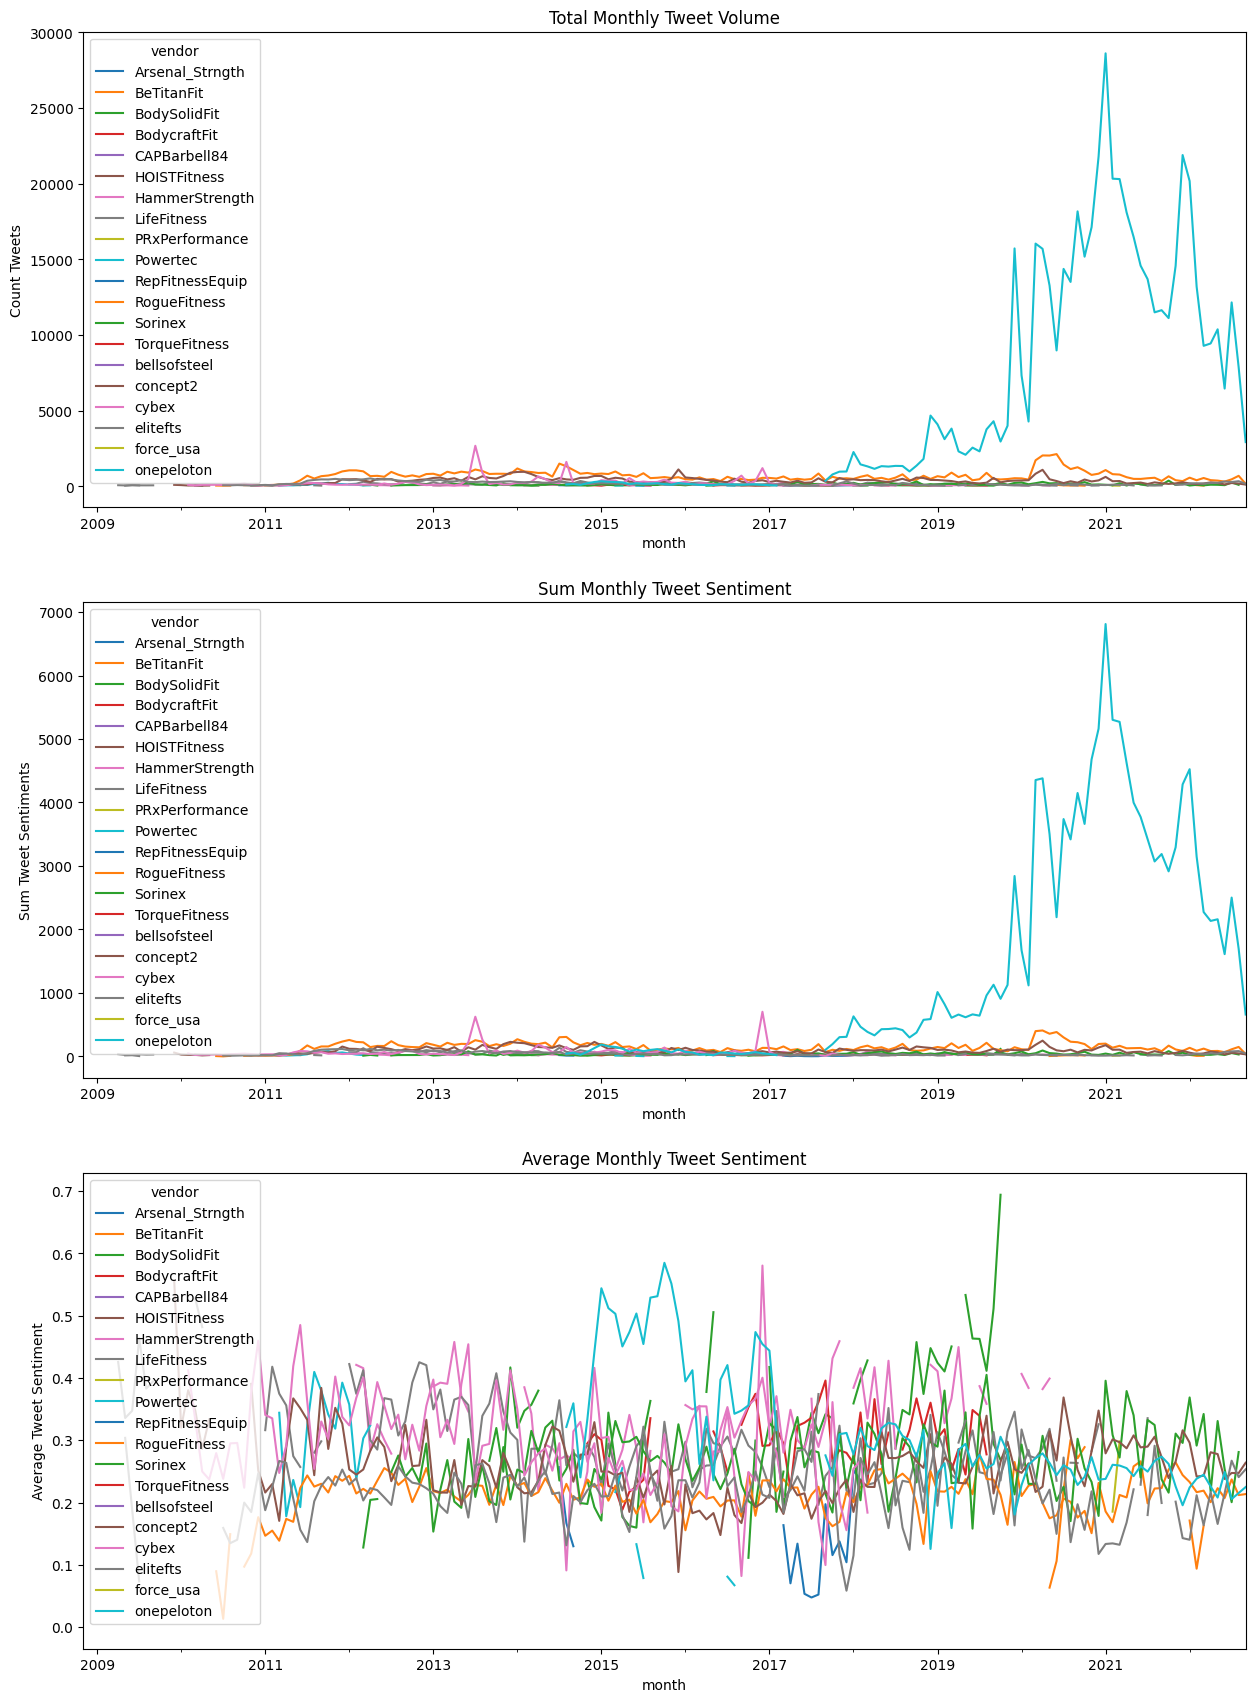

In [51]:
monthly_tweet_volume_threshold = 50
printmd(f"In the following charts, timeseries are missing during months that had less than {monthly_tweet_volume_threshold} tweets.")
fig, axs = plt.subplots(3, 1, figsize=(15, 21))
for plt_index, val, aggfunc, chart_name, chart_ylabel in [
    (0, "tweet_id", "count", "Total Monthly Tweet Volume", "Count Tweets"),
    (1, "sentiment", "sum", "Sum Monthly Tweet Sentiment", "Sum Tweet Sentiments"),
    (2, "sentiment", "mean", "Average Monthly Tweet Sentiment", "Average Tweet Sentiment")]:
    count = (tweet_df
             .assign(**{"month": tweet_df.pd_datetime.dt.to_period('M')})
             .pivot_table(index="month",
                          columns="vendor",
                          values="tweet_id",
                          aggfunc="count")
            )
    result = (tweet_df
              .assign(**{"month": tweet_df.pd_datetime.dt.to_period('M')})
              .pivot_table(index="month",
                           columns="vendor",
                           values=val,
                           aggfunc=aggfunc))
    result[count <= monthly_tweet_volume_threshold] = np.nan
    result.plot(ax=axs[plt_index])
    axs[plt_index].set_title(chart_name)
    axs[plt_index].set_ylabel(chart_ylabel)
plt.show()

- Peloton has the most tweets out of all home-gym vendors.
- Most vendors have a relatively constant and equal sentiment of around 0.3; `RogueFitness` is a bit lower than average, and `HammerStrength` is a bit higher than average.
- Peloton had a spike in tweet volume from 2019-2022, but had a spike in positive sentiment during 2015.